In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [340]:
df=pd.read_csv('ex2data1.txt',header=None)

In [341]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [342]:
X,y=df.iloc[:,:-1].values,df.iloc[:,-1].values

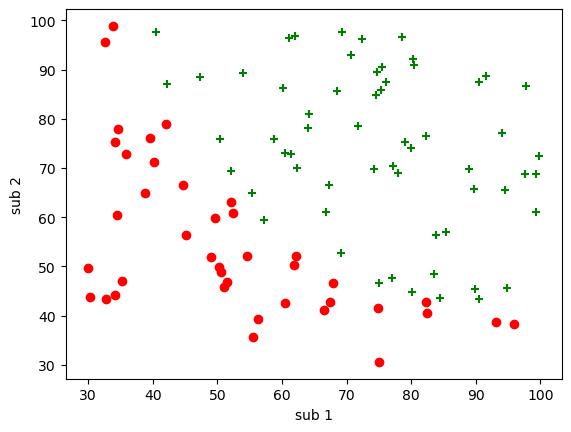

In [343]:
pos,neg=(y==1),(y==0)
plt.scatter(X[pos,0],X[pos,1],marker='+',c='g')
plt.scatter(X[neg,0],X[neg,1],c='r')
plt.xlabel('sub 1')
plt.ylabel('sub 2')
plt.show()

In [344]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [345]:
print(sigmoid(-1000))
print(sigmoid(0))
print(sigmoid(1000))

0.0
0.5
1.0


C:\Users\abdulsamad\AppData\Local\Temp\ipykernel_12868\826162963.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))


In [346]:
# 1/m(-y(log(hx)-(1-y)log(1-hx)))
def costfun(theta,X,y):
    m=len(y)
    H=sigmoid(np.dot(X,theta))
    error=(-y*np.log(H))-((1-y)*np.log(1-H))
    cost=(1/m)*sum(error)
    diff=(1/m)*np.dot(X.transpose(),(H-y))
    return cost,diff

In [347]:
def featureScaling(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    return X_norm,mean,std

In [330]:
m,n=X.shape[0],X.shape[1]
X,X_mean,X_std=featureScaling(X)
X=np.append(np.ones((m,1)),X,axis=1)

In [331]:
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, diff= costfun(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",diff)

Cost of initial theta is [0.69314718]
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [332]:
def gradientDesc(X,y,theta,alpha,num_iter):
    m=len(y)
    J_history=[]
    for i in range(num_iter):
        cost,diff=costfun(theta,X,y)
        theta=theta-(alpha*diff)
        J_history.append(cost)
    return theta , J_history

In [333]:
theta , J_history = gradientDesc(X,y,initial_theta,1,400)

In [334]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: [0.20360044]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

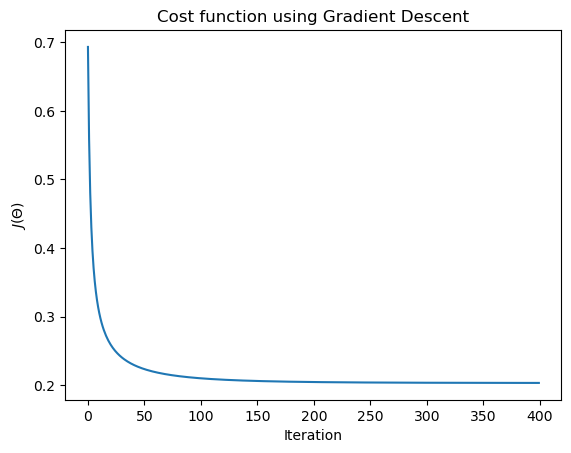

In [335]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

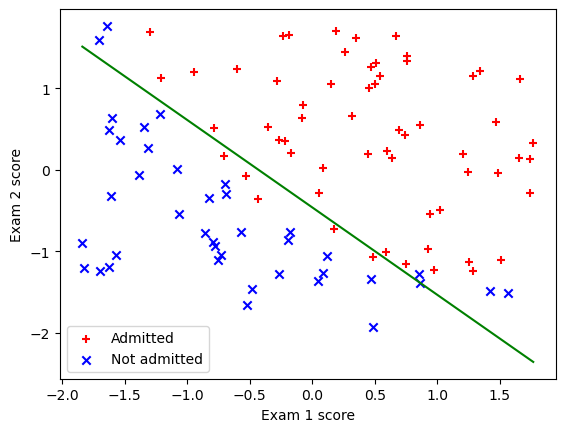

In [311]:
plt.scatter(X[pos,1],X[pos,2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg,1],X[neg,2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] + theta[1] * x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)


In [337]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [338]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792489


In [314]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
